In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [45]:
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
y = np.array([2*el + np.random.choice([-1,1])*6*np.random.rand() for el in X])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)


In [57]:
index_argsort = np.argsort(X_train.reshape(90,))
index_argsort

array([24, 58, 30, 79, 39, 15, 44, 61, 40, 86, 22, 12, 62,  0, 85, 28, 37,
       87, 75, 73, 23,  4, 55, 47, 41, 52, 54, 67, 19, 48, 49,  1, 70, 56,
       17, 57, 83, 88, 32,  7, 68, 53, 21, 84, 45,  3, 51, 64, 43, 16, 59,
        9, 63, 76, 42, 18, 46, 72, 11, 34, 38, 29, 80,  6, 89, 14, 26,  2,
       77, 66, 25, 10, 20, 27, 35, 31, 82, 60, 78,  5, 65,  8, 33, 74, 50,
       69, 81, 13, 71, 36], dtype=int64)

In [59]:
X_train.reshape(90,)

array([ 2.09129084,  7.07121721, 15.14889205,  9.32097864,  4.21035259,
       18.06272502, 13.7063546 ,  8.66415684, 18.53342044, 10.70916299,
       15.67498265, 12.84829977,  1.68849551, 18.99873037, 14.92655983,
        0.7148251 , 10.37025333,  7.7901866 , 12.09930909,  5.92177495,
       16.05129687,  8.93390872,  1.41704669,  4.01789351,  0.19059177,
       15.52585728, 15.00402558, 16.98079398,  2.79763339, 13.38999654,
        0.36730419, 17.76234271,  8.43135065, 18.58585848, 12.91576171,
       17.75132644, 19.60848742,  3.13822221, 13.01281142,  0.65742731,
        1.25112411,  5.31174997, 11.63474389, 10.27160492,  0.90516407,
        9.09709187, 12.70865901,  5.20758171,  5.93507123,  6.46003371,
       18.68712943,  9.55249372,  5.4218907 ,  8.74164548,  5.60211057,
        4.80755053,  7.5037277 ,  7.94071205,  0.25589489, 10.62552025,
       17.84180341,  1.02437926,  2.05962103, 10.81434675,  9.60798585,
       18.39761212, 15.45507828,  5.86116298,  8.69652358, 18.73

In [64]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
model.predict(X_test)

LinearRegression(fit_intercept=False)

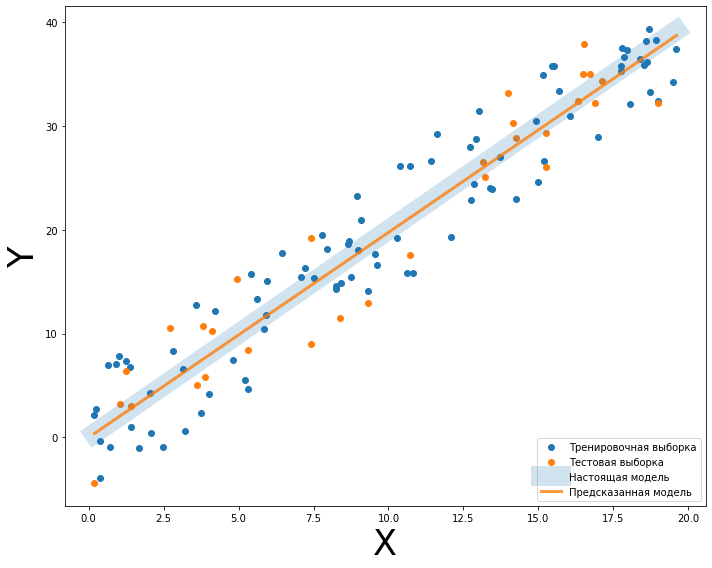

In [128]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график


In [129]:
model.coef_

array([[1.975174]])

In [141]:
X_pol = X_train.copy()

for k in range(2,26):
    X_pol = np.append(X_pol, np.array([x**k for x in X_pol[:,0]]).reshape(90,-1), axis=1)
    

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_pol)
model_pol = LinearRegression()
model_pol.fit(X_train_scaled, y_train)

LinearRegression()

In [147]:
model_pol.coef_

array([[-1.01001742e+03,  4.45166275e+04, -5.11920654e+05,
        -7.90966331e+06,  3.09730370e+08, -4.44832071e+09,
         3.88115559e+10, -2.32128034e+11,  1.00028572e+12,
        -3.16801318e+12,  7.35943567e+12, -1.21611692e+13,
         1.29490408e+13, -5.54494102e+12, -6.27908548e+12,
         1.07712910e+13, -2.07042615e+12, -9.22370559e+12,
         8.47333622e+12,  3.16791714e+12, -1.19475434e+13,
         1.09371291e+13, -5.30368462e+12,  1.39579275e+12,
        -1.58196330e+11]])

In [133]:
X_train[:,0].reshape(90,)

array([ 2.09129084,  7.07121721, 15.14889205,  9.32097864,  4.21035259,
       18.06272502, 13.7063546 ,  8.66415684, 18.53342044, 10.70916299,
       15.67498265, 12.84829977,  1.68849551, 18.99873037, 14.92655983,
        0.7148251 , 10.37025333,  7.7901866 , 12.09930909,  5.92177495,
       16.05129687,  8.93390872,  1.41704669,  4.01789351,  0.19059177,
       15.52585728, 15.00402558, 16.98079398,  2.79763339, 13.38999654,
        0.36730419, 17.76234271,  8.43135065, 18.58585848, 12.91576171,
       17.75132644, 19.60848742,  3.13822221, 13.01281142,  0.65742731,
        1.25112411,  5.31174997, 11.63474389, 10.27160492,  0.90516407,
        9.09709187, 12.70865901,  5.20758171,  5.93507123,  6.46003371,
       18.68712943,  9.55249372,  5.4218907 ,  8.74164548,  5.60211057,
        4.80755053,  7.5037277 ,  7.94071205,  0.25589489, 10.62552025,
       17.84180341,  1.02437926,  2.05962103, 10.81434675,  9.60798585,
       18.39761212, 15.45507828,  5.86116298,  8.69652358, 18.73

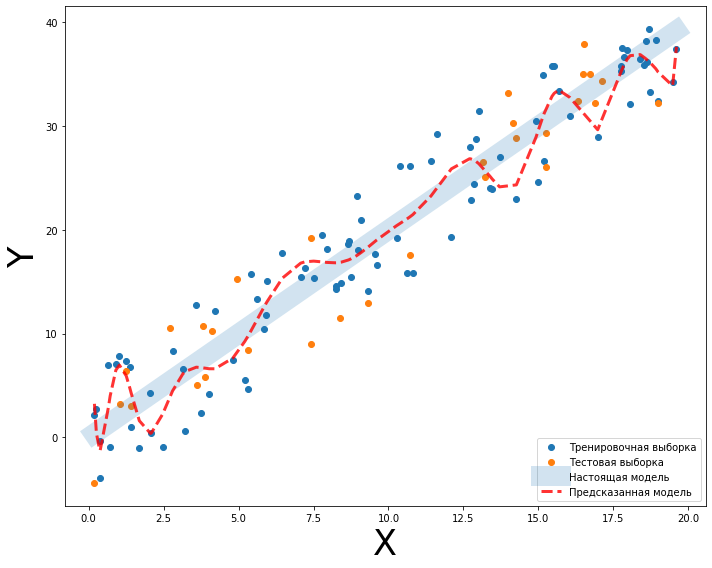

In [150]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model_pol.predict(X_train_scaled[index_argsort]), '--r', alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная полиномиальная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график
